In [4]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
X = iris.data
#reshape for OneHotEncoder
y = iris.target.reshape(-1, 1)

In [8]:
# Standarize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# One-hot encode the labels
encorder = OneHotEncoder(sparse_output=False)
y = encorder.fit_transform(y)

In [10]:
# Train/ Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construct the Neural Network

In [12]:
#import required libraries for building NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## ***For activaton function 'Relu'***

In [22]:
# Define the model
model = Sequential(
    [
        Dense(8, activation='relu', input_shape=(4,)), # Hidden layer
        Dense(3, activation='softmax') # Output layer
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Complie the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1678 - loss: 1.2414 - val_accuracy: 0.0833 - val_loss: 1.1133
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0890 - loss: 1.1147 - val_accuracy: 0.1667 - val_loss: 1.0742
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2155 - loss: 1.0486 - val_accuracy: 0.3333 - val_loss: 1.0383
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3607 - loss: 0.9922 - val_accuracy: 0.4167 - val_loss: 1.0116
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4814 - loss: 0.9465 - val_accuracy: 0.5000 - val_loss: 0.9878
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6024 - loss: 0.8882 - val_accuracy: 0.5833 - val_loss: 0.9648
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6448 - loss: 0.8232 - val_accuracy: 0.5833 - val_loss: 0.9399
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6448 - loss: 0.7992 - val_accuracy: 0.5833 - 

# Evaluate the Model

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.1334
Test Accuracy: 1.0


## ***For activaton function 'tanh'***

In [26]:
# Define the model
model = Sequential(
    [
        Dense(8, activation='tanh', input_shape=(4,)), # Hidden layer
        Dense(3, activation='softmax') # Output layer
    ]
)

In [27]:
# Complie the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3990 - loss: 1.1303 - val_accuracy: 0.4167 - val_loss: 1.1742
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3337 - loss: 1.0749 - val_accuracy: 0.4167 - val_loss: 1.1039
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3740 - loss: 0.9888 - val_accuracy: 0.4167 - val_loss: 1.0408
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3902 - loss: 0.9185 - val_accuracy: 0.5000 - val_loss: 0.9842
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6184 - loss: 0.8365 - val_accuracy: 0.5833 - val_loss: 0.9330
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7139 - loss: 0.7795 - val_accuracy: 0.5833 - val_loss: 0.8872
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.7758 - val_accuracy: 0.5833 - val_loss: 0.8427
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6694 - loss: 0.7160 - val_accuracy: 0.5833 - 

In [30]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9667 - loss: 0.0811
Test Accuracy: 0.9666666388511658


In [32]:
import matplotlib.pyplot as plt

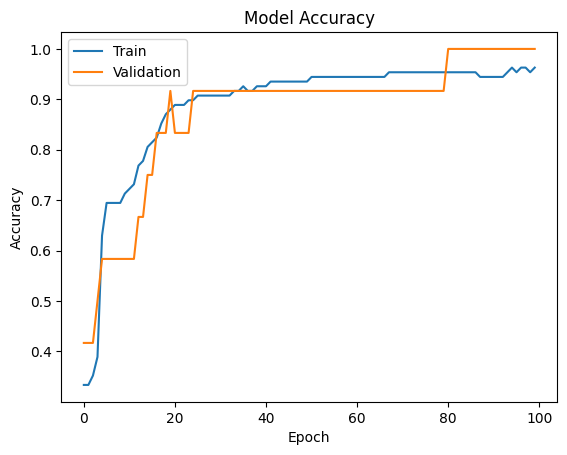

In [35]:
#plot model accurcy
plt.plot(history.history['accuracy'], label = 'Train_Acc')
plt.plot(history.history['val_accuracy'], label = 'Val_Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

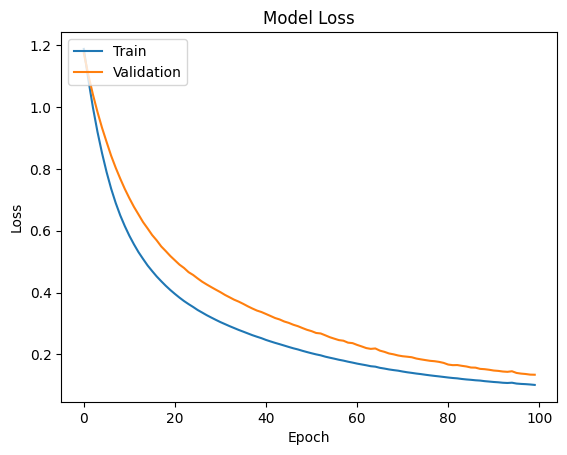

In [36]:
#plot model loss
plt.plot(history.history['loss'], label = 'Train_Loss')
plt.plot(history.history['val_loss'], label = 'Val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()